# PRACTICAL IMPLEMENTATION OF LINEAR REGRESSION

**THEME**

The dataset describes city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.

Attribute Information:

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

**The current workflow involves a clear application of each and every step and the noteboook will forge you to work on more diverse datasets.**

# **PULLING THE DATASET LOCALLY**

We will be using the Kaggle dataset of an Automobile's rate of fuel consumption in miles per gallon as an estimate by the mining the given technical features. 

Download the [autompg.csv](https://www.kaggle.com/uciml/autompg-dataset/home) file in your file system. 

Then upload the file below if using colab, else place the file in same path as this file in your file system. 

If you want more details on file system etc. please [read the full article](https://www.datacamp.com/community/tutorials/pandas-read-csv) from where we have pulled this tutorial.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving housedata.csv to housedata (1).csv


In [0]:
#importing the pandas package
import pandas as pd

In [0]:
# loading the 'autompg.csv' data set which will be provided to you :)
dataframe = pd.read_csv('housedata.csv')

# DIGGING INTO THE DATA

**.info() in pandas**

This method is prerogatively used for understanding the sort of data types present in indexes, columns and non-null values. It also shows up the memory used.

Follow the [documentation](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.info.html)

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4396 entries, 0 to 4395
Data columns (total 21 columns):
id               4396 non-null int64
date             4396 non-null object
price            4396 non-null float64
bedrooms         4396 non-null int64
bathrooms        4396 non-null float64
sqft_living      4396 non-null int64
sqft_lot         4396 non-null int64
floors           4396 non-null float64
waterfront       4396 non-null int64
view             4396 non-null int64
condition        4396 non-null int64
grade            4396 non-null int64
sqft_above       4396 non-null int64
sqft_basement    4396 non-null int64
yr_built         4396 non-null int64
yr_renovated     4396 non-null int64
zipcode          4396 non-null int64
lat              4396 non-null float64
long             4395 non-null float64
sqft_living15    4395 non-null float64
sqft_lot15       4395 non-null float64
dtypes: float64(7), int64(13), object(1)
memory usage: 721.3+ KB


**.describe() in pandas**

This method facilitates with the descriptive statistics involving Mean,Standard Deviation, etc.

Follow the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

In [6]:
dataframe.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,4.396000e+03,4.396000e+03,4396.000000,4396.000000,4396.000000,4.396000e+03,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4395.000000,4395.000000,4395.000000
mean,4.620277e+09,5.385529e+05,3.369654,2.061306,2057.488626,1.579570e+04,1.430164,0.009327,0.243858,3.457916,7.590992,1748.192903,309.295723,1966.646952,94.908098,98078.678799,47.559557,-122.215946,1973.177019,13403.707850
std,2.868658e+09,3.880678e+05,0.911351,0.775511,922.936164,4.359692e+04,0.510985,0.096134,0.775123,0.678822,1.163593,815.582745,457.410963,28.206052,424.859973,54.324421,0.139923,0.141278,677.743384,26613.199102
min,1.000102e+06,7.500000e+04,0.000000,0.000000,380.000000,6.090000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,2.144525e+09,3.163750e+05,3.000000,1.500000,1410.000000,5.410250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1949.000000,0.000000,98033.000000,47.462850,-122.329000,1480.000000,5400.000000
50%,4.015755e+09,4.475000e+05,3.000000,2.000000,1890.000000,7.930000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1520.000000,0.000000,1968.000000,0.000000,98070.000000,47.573200,-122.236000,1820.000000,7842.000000
75%,7.338251e+09,6.450000e+05,4.000000,2.500000,2500.000000,1.120000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2120.000000,600.000000,1990.000000,0.000000,98118.000000,47.679425,-122.130000,2340.000000,10443.000000
max,9.842300e+09,7.062500e+06,9.000000,6.750000,10040.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,7680.000000,2620.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,434728.000000


**DATA PREPROCESSING PHASE**

This is a key phase, in which we explore the anomalies in the dataset, that may affect the further performance of the Model, remove them and make the dataset more processed and clean, that is eventually fed into the Model that we are trying to build


Possible **Anomalies** are :-


1.   Missing Values/Null Values  --> Categorical or Numerical
2.   Irrelevant Observations
3.   Outliers etc.


For the present scenario, we'll be seeing whether there are any sort of missing values in the dataset.

To find the total number of missing or null values that each feature has?

We can apply **isnull()** method in pandas that describes whether there are missing values in the dataset or not , and **sum()** to know the total number of null values in each feature.

[Documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html) for **isnull()**

[Documentation](https://python-reference.readthedocs.io/en/latest/docs/functions/sum.html) for **sum()**

In [7]:
dataframe.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             1
sqft_living15    1
sqft_lot15       1
dtype: int64

We can observe that there are no null/ missing values in the dataset, Hence there is further requirement to process the data and Hence, we can continue with the implementation.

# **DATA VISUALIZATION**

In this phase we'll be exploring the data in the form of charts, plots, graphs etc.

Visualizing the data can show us more inferences and there are different sort's of illustration's that facilitate this purpose.

Like bar charts, Scatterplots, Histograms etc.

For the current purpose, We'll be implementing a **[PAIRPLOT](https://seaborn.pydata.org/generated/seaborn.pairplot.html)**, a dynamic plotting technique in [seaborn](https://seaborn.pydata.org/) library of python that illustrates pairwise relationships in a dataset.

In [0]:
import seaborn as sns

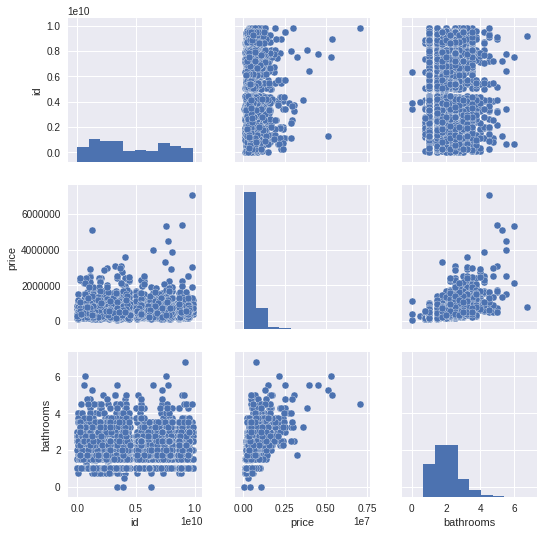

In [12]:
sns.pairplot(data = dataframe[['id','price','bathrooms']])

**INFERENCES FROM THE VISUALIZATION**

We can clearly observe from the visualization that in the first row, the feature 'mpg' is having negative correlation with **displacement** and **weight**, positive correlation with **acceleration**.

Read more about the significance of [correlation](https://onlinecourses.science.psu.edu/stat100/node/35/).



Hence we have to extract only the features displacement, weight, acceleration as the final feature set and the label to be mpg(miles per gallon)

In [0]:
features = dataframe[['id','bathrooms']]

In [0]:
target = dataframe['price']

# EXPLRORING THE TERM NORMALIZATION

Observe the histogram illustrated in the below. We observe that most of the values are been concentrated to the left region of the histogram, it simply means there isn't any harmony in the data values.

Hence, in order to bring about an intervention in the workflow and  to bring the data values into a harmony i.e., to bring them to a common scale, We apply **[NORMALIZATION](https://docs.microsoft.com/en-us/azure/machine-learning/studio-module-reference/normalize-data)**.

In [0]:
import matplotlib.pyplot as plt

(array([3.713e+03, 5.720e+02, 6.800e+01, 2.600e+01, 9.000e+00, 3.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([  75000.,  773750., 1472500., 2171250., 2870000., 3568750.,
        4267500., 4966250., 5665000., 6363750., 7062500.]),
 <a list of 10 Patch objects>)

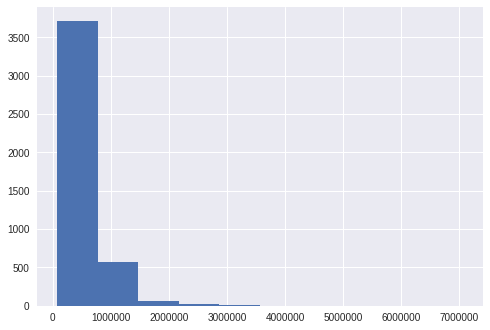

In [16]:
plt.hist(target,bins=10)

**HOW TO RESOLVE NORMALIZATION?**

Well there are precisely many techniques available to apply Normalization to data.

Learn More [here](https://docs.microsoft.com/en-us/azure/machine-learning/studio-module-reference/normalize-data).

In the present scenario we are gonna work with **LOG TRANSFORMS** normalization technique which is facilitated by **[NUMPY](http://www.numpy.org/)** library in Python.

Explore this [link](https://machinelearningblogs.com/2016/11/22/3-data-transformation-tips-python/) for further information.

In [0]:
import numpy as np

In [0]:
#implementation of log transforms using log() method.
dataframe_normalized = np.log(target)

**HISTOGRAM AFTER NORMALIZATION**

We can observe a bell shaped curve is obtained after the implementation of LOG TRANSFORMS.

(array([  11.,  116.,  789., 1403., 1275.,  584.,  155.,   46.,   12.,
           5.]),
 array([11.22524339, 11.67975002, 12.13425664, 12.58876327, 13.0432699 ,
        13.49777652, 13.95228315, 14.40678978, 14.8612964 , 15.31580303,
        15.77030965]),
 <a list of 10 Patch objects>)

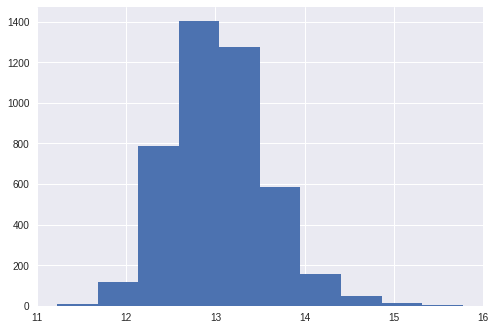

In [19]:
plt.hist(dataframe_normalized)

**WHAT HAPPENS WHEN WE DON'T APPLY NORMALIZATION?**

To know the importance of Normalization observe the performance scores of the Linear Regressor Model trained with Un- Normalized data and in another instance training with Normalized data.

**RESULT WITHOUT NORMALIZATION**

In [0]:
#train test split
from sklearn.model_selection import train_test_split

In [0]:
#result without normalization
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,train_size=0.8)

In [0]:
# performance metric -> Co-Efficient of Determination (r2_score)
from sklearn.metrics import r2_score

In [0]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression

In [0]:
#Feeding the Model
regressor = LinearRegression()
reg_fit = regressor.fit(X_train,y_train)
reg_pred = reg_fit.predict(X_test)

In [0]:
#score of unnormalized data
score_not_norm = r2_score(y_test,reg_pred)

In [26]:
print(score_not_norm)

0.2700642677997166


**RESULT WITH NORMALIZATION**

In [0]:
#result with normalization
X_train_n,X_test_n,y_train_n,y_test_n = train_test_split(features,dataframe_normalized,test_size=0.2,train_size=0.8)

In [0]:
#Feeding the Model
regressor_norm = LinearRegression()
reg_fit_norm = regressor.fit(X_train_n,y_train_n)
reg_pred_norm = reg_fit.predict(X_test_n)

In [0]:
#score of normalized data
score_norm = r2_score(y_test_n,reg_pred_norm)

In [0]:
print(score_norm)

0.7538778085736144


# JUSTIFICATION


It is clearly inferred from the analysis above that by the implementation of NORMALIZATION we can observe that the performance of  **LINEAR REGRESSOR** model is better than the one trained with un-normalized data.

# ACTIVITY

Explore your skill set by working on diverse datasets that need Linear Regression Model to be applied.

This gives you the confidence to tackle with diverse data.

You can try these datasets:-

[House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction)


[Medical Cost Personal Data Sets](https://www.kaggle.com/mirichoi0218/insurance)


[Red Wine Quality](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)


[Concrete Strength Regression](https://www.kaggle.com/maajdl/yeh-concret-data)

[IMDB Data Set](https://www.kaggle.com/maajdl/yeh-concret-data)
